# fastai v1 
## image classifier 

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
print(torch.__version__)
import fastai
print(fastai.__version__)

1.0.0.dev20181022
1.0.12.dev0


In [4]:
path = untar_data(URLs.PETS)
path_img = path/'images'
path_img

PosixPath('/home/chihchungwang/.fastai/data/oxford-iiit-pet/images')

In [5]:
#resnet50
size=299
bs=48
#resnet34
#size=224
#bs=64

In [6]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [7]:
fnames = get_image_files(path_img)
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=size, bs=bs)
data.normalize(imagenet_stats)

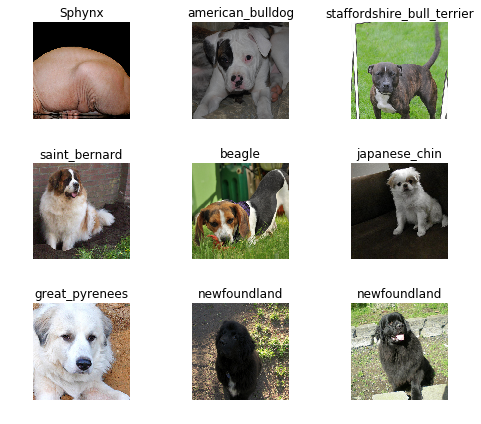

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
print(data.classes)

['staffordshire_bull_terrier', 'havanese', 'Bombay', 'chihuahua', 'american_pit_bull_terrier', 'english_cocker_spaniel', 'beagle', 'shiba_inu', 'american_bulldog', 'newfoundland', 'japanese_chin', 'pug', 'samoyed', 'pomeranian', 'Russian_Blue', 'miniature_pinscher', 'keeshond', 'boxer', 'Birman', 'Egyptian_Mau', 'British_Shorthair', 'Persian', 'Ragdoll', 'Bengal', 'saint_bernard', 'Abyssinian', 'scottish_terrier', 'Sphynx', 'yorkshire_terrier', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'leonberger', 'wheaten_terrier', 'Maine_Coon', 'basset_hound', 'Siamese']


In [10]:
learn = ConvLearner(data, models.resnet50, metrics=error_rate)
#learn = ConvLearner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

RuntimeError: CUDA error: out of memory

In [18]:
learn.save('stage-1')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

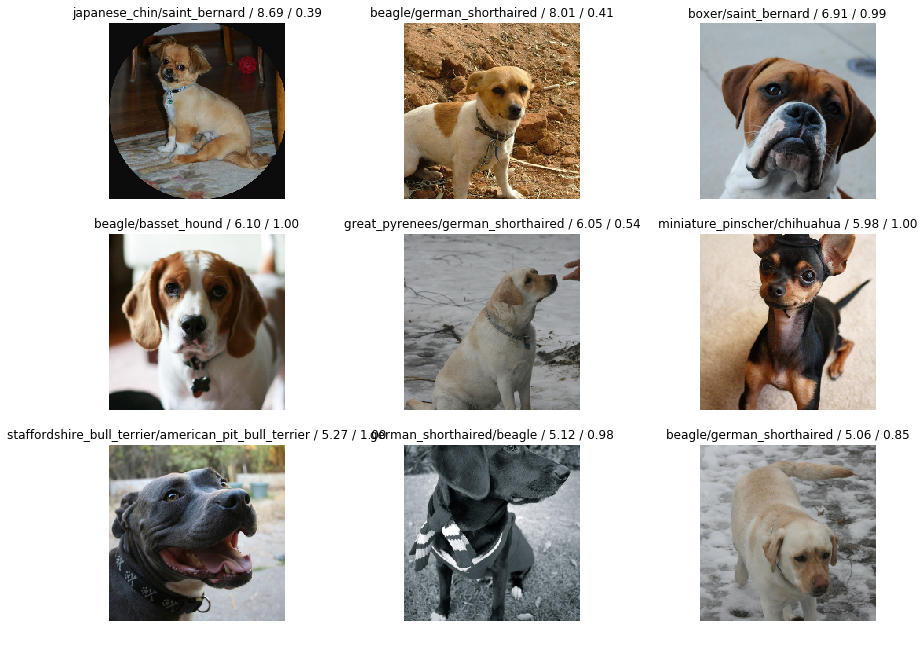

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

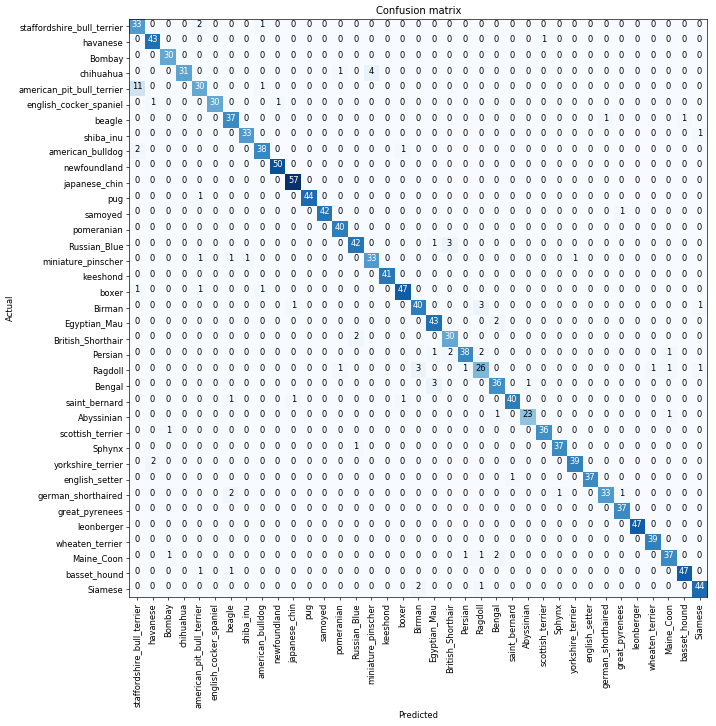

In [21]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [23]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 11),
 ('chihuahua', 'miniature_pinscher', 4),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('Birman', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('Bengal', 'Egyptian_Mau', 3)]

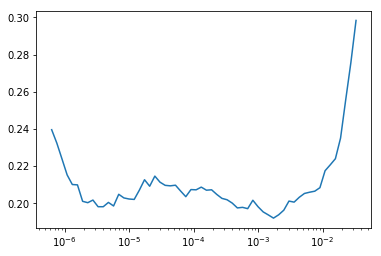

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 00:43
epoch  train loss  valid loss  error_rate
1      0.206158    0.210188    0.065868    (00:21)
2      0.183920    0.199414    0.057884    (00:21)

